In [1]:
import matplotlib.pyplot as plt
andy = plt.imread('andy.jpg')
print(andy.shape)
plt.imshow(andy)
plt.show()

(400, 400, 3)


<Figure size 640x480 with 1 Axes>

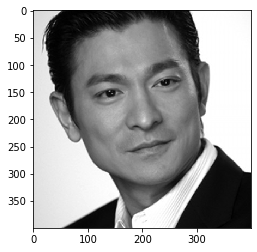

In [2]:
# 轉灰階
from skimage import color
andy_gray = color.rgb2gray(andy) * 255.0
andy_gray.shape
plt.imshow(andy_gray, cmap='gray')
plt.show()

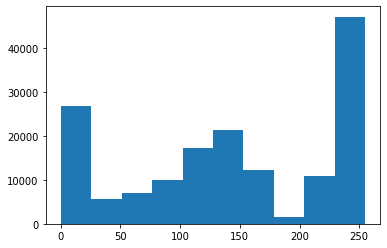

In [3]:
# histgram
plt.hist( (andy_gray).ravel())
plt.show()

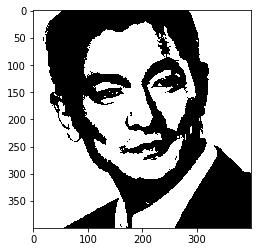

In [4]:
# black and white
value = 127
andy_bin = andy_gray   > 125
plt.imshow(andy_bin, cmap='gray')
plt.show()

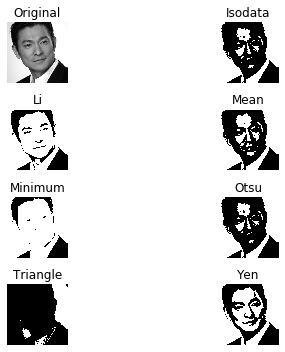

In [5]:
from skimage.filters import try_all_threshold
fig, ax = try_all_threshold(andy_gray, verbose= False)


153.896484375


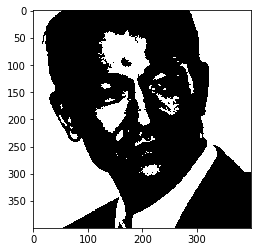

In [6]:
from skimage.filters import threshold_otsu
thresh = threshold_otsu(andy_gray)
print(thresh)
andy_bin_otsu = andy_gray > thresh
plt.imshow(andy_bin_otsu, cmap='gray')
plt.show()

In [17]:
def show_image_contour(image, contours):
    plt.figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:, 1], contour[:, 0], linewidth=3)
    plt.imshow(image, interpolation='nearest', cmap='gray_r')
    plt.title('Contours')
    plt.axis('off')
    plt.show()

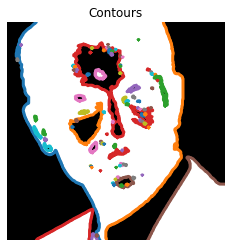

In [25]:
from skimage import measure
contours = measure.find_contours(andy_bin_otsu, 0.9)
show_image_contour(andy_bin_otsu, contours)

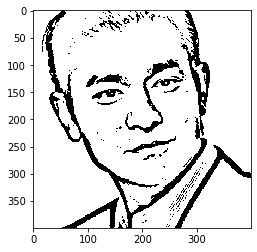

In [7]:
from skimage.filters import threshold_local
thresh = threshold_local(andy_gray, 35, offset=10)
#print(thresh)
andy_bin_local = andy_gray > thresh
plt.imshow(andy_bin_local, cmap='gray')
plt.show()

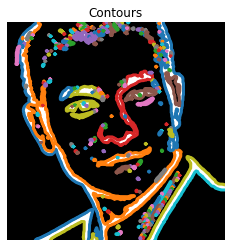

In [27]:
from skimage import measure
contours = measure.find_contours(andy_bin_local, 0.8)
show_image_contour(andy_bin_local, contours)